### Unidad 1: Taller de resolución de problemas de clasificación automática

<h1> Notebook 1 - Regresión Lineal y Regresión logística</h1>

## 1. Conceptos 

Podemos formalizar un problema de clasificación de la forma siguiente:

* tenemos una variable **s** que corresponde a un objeto observable del mundo. Por ejemplo, un "vehiculo", una "imagén", un "documento", etc. Esta variable la llamamos a veces _instancia_ o _observación_ .


* queremos relacionar la variable **s** con una variable **y** (variable _dependiente_ o _explicada_). **y** puede pertenecer a un conjunto discreto, por ejemplo **Y**= { auto, bicicleta, camion }, o a un conjunto continuo.
    * en el caso discreto, hablamos de problema de <u>clasificación discreta</u>. Por ejemplo: ¿Cuál la categoría del vehiculo **s**? **y**=es una bicicleta.
    * en el caso continuo, hablamos de problema de clasificación de tipo <u>regresión</u>. Por ejemplo: ¿En cuánto tiempo el vehiculo va a fallar? **y**= en 6 meses.


*  Para relacionar **s** con **y**, necesitamos poder observar un conjunto **X** de sus características (variables _independientes_ o _explicativas_). Por ejemplo **x_1**: su número de ruedas, **x_2**: su altura, **x_3**: el nivel de ruido que hace.


Los algoritmos capaces de **aprender**, a partir de ejemplos pasados, cuáles son los buenos parametros que permiten aproximar la relación entre **X** e **y** se llaman **algoritmos de aprendizaje supervisado**.

<p> En este primer notebook, utilizaremos y describiremos 2 algoritmos de aprendizaje supervisado simples:</p>
* el algoritmo de **regresión lineal**: que permite resolver problemas de clasificación de tipo regresión.

* el algoritmo de **regresión logística**: que permite resolver problemas de clasificación discrecta.

<h2> 2. Regresión Lineal: un primer ejemplo en Python con 1 variable explicativa</h2>

<p>Consideremos el problema siguiente: predecir un volumen de negocio.</p>
<i>Usted es el jefe de una empresa de <i>FoodTrucks</i> y busca una nueva ciudad dónde implementar un nuevo punto de venta. Su empresa ya tiene camiones en distintas ciudades y tiene a su disposición los datos indicandos el beneficio realizado en cada ciudad. Usted desea utilizar estos datos para estimar qué beneficio van a realizar según la ciudad escogida.</i>

<p> Este problema es de tipo <b>supervisado</b> porque conocemos cuál es el tipo de variable que queremos predecir:</p>
 - y: la variable que queremos predecir (<i>volumen de negocio</i>),<br>
 - x: la variable explicativa (<i>tamaño de la ciudad</i>)

In [1]:
#Nuestros datos son al formato CSV y tienen 2 columnas: la populación de la ciudad (por 10000 personas) 
#y el beneficio realizado por la empresa en este ciudad
import pandas as pd
df = pd.read_csv("datos/nb1-dataset1.csv")
df[:10]

,Population (10000 pers.),Beneficio (10K$)
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [2]:
#selección de la primera columna de nuestro dataset (tamaño de la populacion)
X = df.iloc[0:len(df),0]
#selección de la segunda columna de nuestro dataset (volumen de negocio)
Y = df.iloc[0:len(df),1] 

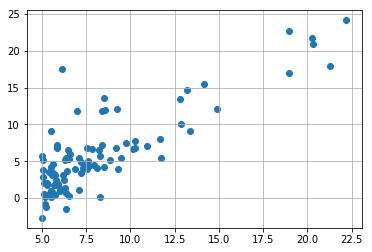

In [4]:
#Visualización de los datos
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

Para aprender un modelo predictivo basado en una regresión lineal, vamos a utilizar la librería Python ScyPy (una librería python open-source para las matemáticas: <a href="https://www.scipy.org/">SciPy</a>).

In [5]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

In [6]:
#Definemos una función que predice 'y' (variable de output), a partir de 'x' (variable de input)  
def predict(x):
    print("y = "+str(slope)+"*x "+str(intercept))
    return slope * x + intercept

y = 1.1930336441895941*x -3.8957808783118555


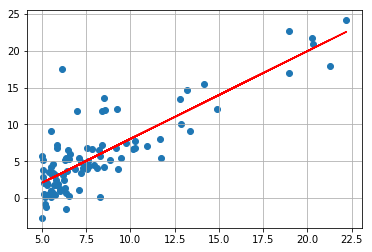

In [7]:
#Visualizemos el modelo aprendido por el algoritmo de Regresión Lineal
fitLine = predict(X)
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.plot(X, fitLine, c='r')
plt.show()

<div style="background-color: #c47968">

<b>Por completar:</b>

<p>- Según este modelo, ¿cuál sería el beneficio esperado si la ciudad en la cual pensamos instalar un _FoodTruck_ tiene 127.000 habitantes?</p>

<p>- ¿Cuáles preguntas pueden formular sobre el algoritmo de Regresión Lineal?</p>

</div>

In [8]:
#...

y = 1.1930336441895941*x -3.8957808783118555


11.255746402895989

<h2> 3. Regresión Lineal: un segundo ejemplo en Python con 2 variables explicativas</h2></h2>

En general, no es siempre posible predecir una variable a partir de una sola variable explicativa. A menudo, se necesita varias variables. En este caso, hablamos de <i>Multivariate Regresion</i>.

Consideremos el problema siguiente:

<i>Supongamos que usted quiere vender su casa y buscar cuál podría ser un buen precio para venderla. Tienen a su disposición un dataset que indica el precio de venta de varias casas de su región y de 2 otras variables:
- la superficie de la casa, <br>
- el número de habitaciones.</i>

In [9]:
import pandas as pd
df2 = pd.read_csv("datos/nb1-dataset2.csv")
print(df2.head())

   Superficie  Numero_habitaciones  Precio
0        2104                    3  399900
1        1600                    3  329900
2        2400                    3  369000
3        1416                    2  232000
4        3000                    4  539900


Luego, tenemos que diferenciar las variables predictivas X (Superficie, Numero de habitaciones) y la variable objetivo Y (Precio).

In [10]:
# Variable objetivo
Y = df2["Precio"]
# Variables predictivas (o explicativas)
X = df2[['Superficie','Numero_habitaciones']]

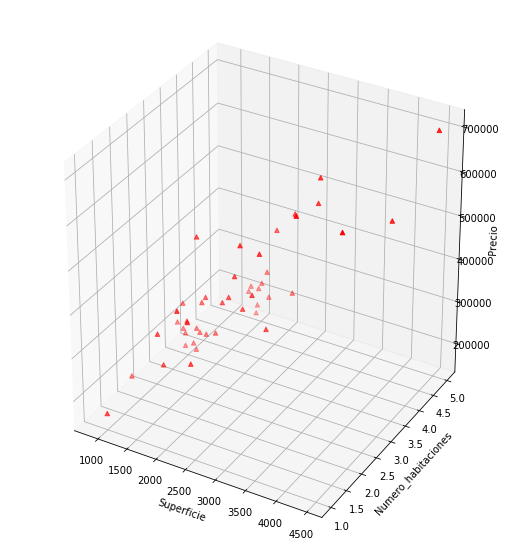

In [11]:
#Visualizemos los datos en un espacio en 3 dimensiones
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter(df2["Superficie"], df2["Numero_habitaciones"], df2["Precio"], c='r', marker='^')
 
ax.set_xlabel('Superficie')
ax.set_ylabel('Numero_habitaciones')
ax.set_zlabel('Precio')
 
plt.show()

Para poder utilizar el algoritmo Multivariate Regresion, es necesario realizar una etapa de normalización de las variables, para darles un valor entre -1 y 1. La librería Python Scikit-learn permite realizar este proceso.

In [12]:
from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['Superficie', 'Numero_habitaciones']].as_matrix())

/home/mvernier/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/mvernier/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mvernier/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Entre los algoritmos de Regresión Múltiples, existe el método <i>Ordinary Least Squares</i> (OLS). OLS es un método de optimización que busca minimizar la suma de las diferencias observadas entre las predicciones del modelo y los datos de entrenamiento. Con el paquete 'statsmodels', se puede entrenar un modelo OLS y obtener un resumen del modelo:

In [13]:
import statsmodels.api as sm

est = sm.OLS(Y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     631.4
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.19e-33
Time:                        11:12:48   Log-Likelihood:                -589.11
No. Observations:                  47   AIC:                             1182.
Df Residuals:                      45   BIC:                             1186.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Superficie            140.8611    

La variable 'coef' nos indica cuál es el factor de ponderación de cada variable predictiva. Podemos entonces construir nuestra funcion de predicción:

In [14]:
def predict_price_of_house(Superficie, Numero_habitaciones):
    return 140.8611 * Superficie + 1.698e+04 * Numero_habitaciones

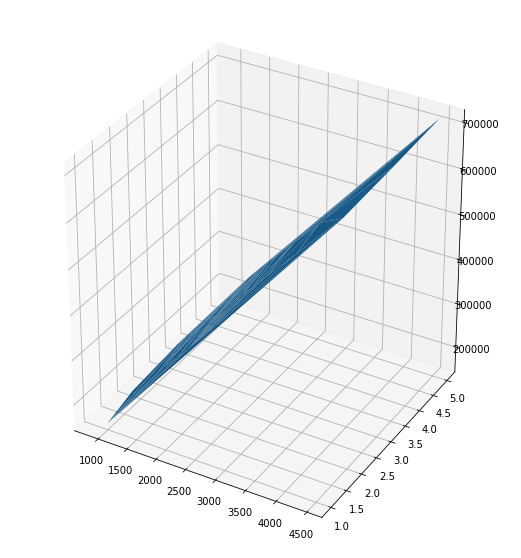

In [15]:
#Visualización del modelo obtenido

import matplotlib.pyplot as plt

def predict_all(lst_sizes, lst_nb_rooms):
    predicted_prices = []
    for n in range(0, len(Y)):
        predicted_prices.append(predict_price_of_house(lst_sizes[n], lst_nb_rooms[n]))
    return predicted_prices

    
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,2,1, projection='3d')
 
ax.plot_trisurf(df2["Superficie"], df2["Numero_habitaciones"], predict_all(df2["Superficie"], df2["Numero_habitaciones"]))
                   
plt.show()


In [16]:
print(predict_price_of_house(4500,5))

718774.95


<div style="background-color: #c47968">

<b>Por completar:</b>

<p>- ¿Cuáles son los límites de los algoritmos de Regresión Lineal?</p>

</div>

**Truco: ¿Qué hacer con las variables categoriales**  

En el algoritmo de regresión lineal (como en otros algoritmos de aprendizaje supervisado) solamente se pueden utilizar variables númericas. ¿Pero qué hacer si necesitamos utilizar variables categoriales?

Por ejemplo, supongamos que queremos introducir una variable categorial _país_ en el modelo que indica el país dónde se vende las casas. P = {Chile, Argentina, Brazil}.

El truco, llamado _dummy variable_, consiste en transformar la variable _país_ en 3 variables booleanas: _chile_ (0 o 1), _argentina_ (0 o 1), _brazil_ (0 o 1).

<h2> 4. Regresión Líneal: Trabajo práctico </h2>

<b>Consideremos el problema siguiente</b>: 
    
<i>Tenemos a disposición un dataset con 1338 observaciones (filas) y 7 características (columnas): edad, genero, bmi (body mass index), número de niños, si es fumadora o no, su región y sus gastos en salud.</i>

<br/>
<div style="background-color: #c47968">

<b>Preguntas:</b>

<p>- Entrenar un modelo predictivo que estima los gastos de salud de un hombre de 55 años, sin niño, teniendo un bmi de 42.6, fumador.</p>

<p>- Desde un punto de vista del emprendimiento, ¿qué podría ser el valor añadido de este tipo de modelo predictivo? a quién podría servir?, Desde un punto de vista científico y ético, ¿qué críticas podría emitir?</p>

</div>

In [ ]:
#...

## 5. Regresión logística: un primer ejemplo en Python

La regresión logística es el algoritmo de clasificación discreta para resolver problemas con 2 categorías (o clases). Utiliza la función logística para relacionar las variables caractéristicas **X** con la variable explicada **y**. En este contexto, **y** corresponde a la probabilidad de pertenencia de la observación **s** a una de las dos categorías.

Por ejemplo, consideremos el problema siguiente:

<i>Tenemos algunos datos de los pasajeros del Titanic y queremos aprender un modelo capaz de predecir cuál es la probabilidad de sobrevivir de los pasajeros a un naufragio de tipo Titanic.</i>

* La clase '1' corresponde a los pasajeros que deberían "sobrevivir"

* La clase '0' corresponde a los pasajeros que deberían "morir"


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')
             
## Cargamos el dataset

titanic = pd.read_csv("datos/titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

<b>DESCRIPCIONES VARIABLES</b>

Survived - Sobrevivencia (0 = No; 1 = Sí)<br>
PClass - Pasajero Clase (1 = 1º; 2 = 2º; 3 = 3º)<br>
Name - Nombre<br>
Sex - Genero<br>
Edad - Edad<br>
SibSp - Número de hermanos/cónyuges a bordo<br>
Parch - Número de padres/hijos a bordo<br>
Tickete - Número de billete<br>
Fare - Precio del tickete<br>
Cabin - Cabina<br>
Embarked - Puerto de Embarque (C = Cherbourg; Q = Queenstown; S = Southampton)<br>

In [ ]:
sb.countplot(x='Survived',data=titanic, palette='hls')

**¿Faltan datos en el dataset?**

Comprobar si hay valores faltantes llamando al método isnull(), y el método sum() fuera de él, para devolver un recuento de todos los valores Verdaderos que son devueltos por el método isnull().

In [ ]:
titanic.isnull().sum()

** ¿Cuántas observaciones hay en total? **

In [ ]:
titanic.info()

**¿Cómo procesar los datos faltantes?**

Podemos suprimir todas las variables que no son relevantes para predecir la sobrevivencia. Al menos deberíamos mantener lo siguiente:

    Survived - Esta variable es obviamente relevante.
    PClass - ¿Afecta la clase de un pasajero en el barco a su capacidad de sobreviviencia?
    Sex - ¿Podría el género de un pasajero afectar su tasa de sobreviviencia?
    Age - ¿Impacta la edad de una persona en su tasa de sobrevivencia?
    SibSp - ¿El número de parientes en el barco (que son hermanos o cónyuge) afecta la sobrevivencia de una persona?
    Parch - ¿El número de parientes en el barco (que son niños o padres) afecta la supervivencia de una persona?
    Tarifa - ¿La tarifa que paga una persona afecta su sobrevivencia? Tal vez, conservémoslo.
    Embarcado - ¿Importa el punto de embarque de una persona? Depende de cómo se llenó el barco... Vamos a conservarlo.

El nombre de una persona, el número de boleto y el número de identificación de pasajero no son relevantes para predecir la supervivencia. Y como recordarán, faltan muchos datos en la variable Cabin así que podemos suprimirla también.


In [ ]:
titanic_data = titanic.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titanic_data.head()

Ahora tenemos un dataset reducido a sólo variables relevantes, pero ahora tenemos que ocuparnos de los valores que faltan en la variable de _edad_.

Veamos cómo se relaciona la edad del pasajero con su clase como pasajero en el barco.

In [ ]:
sb.boxplot(x='Pclass', y='Age', data=titanic_data, palette='hls')

Hablando a grandes rasgos, podríamos decir que cuanto más joven es un pasajero, más probable es que esté en tercera clase. Cuanto mayor sea el pasajero, mayor será la probabilidad de que esté en primera clase. Por lo tanto, existe una relación poco estrecha entre estas variables. Por lo tanto, escribamos una función que se aproxime a la edad de un pasajero, basada en su clase. Desde el punto de vista de la caja, parece que la edad media de los pasajeros de primera clase es de unos 37 años, la de los pasajeros de segunda clase es de 29 y la de los pasajeros de tercera clase es de 24 años.

Así que escribamos una función que encuentre cada valor nulo en la variable Age, y por cada nulo, verifique el valor de la Clase P y asigne un valor de edad de acuerdo a la edad promedio de los pasajeros en esa clase.


In [ ]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(age_approx, axis=1)
titanic_data.isnull().sum()

Hay 2 valores nulos en la variable embarcada. Podemos eliminar esos dos registros sin perder demasiada información importante de nuestro conjunto de datos, así que lo haremos.

In [ ]:
titanic_data.dropna(inplace=True)
titanic_data.isnull().sum()

**¿Cómo convertir variables categoriales en variables _dummy_?**

Necesitamos reformatear las variables _Gender_ y _Embarked_ en variables numéricas.

In [ ]:
gender = pd.get_dummies(titanic_data['Sex'],drop_first=True)
gender.head()

In [ ]:
embark_location = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark_location.head()

In [ ]:
titanic_data.drop(['Sex', 'Embarked'],axis=1,inplace=True)
titanic_data.head()

In [ ]:
titanic_dmy = pd.concat([titanic_data,gender,embark_location],axis=1)
titanic_dmy.head()

**¿Cómo visualizar la relación entre variables?**

In [ ]:
sb.heatmap(titanic_dmy.corr())

Fare y Pclass no son independientes el uno del otro, así que vamos a suprimir uno (Pclass por ejemplo).

In [ ]:
titanic_dmy.drop(['Pclass'],axis=1,inplace=True)
titanic_dmy.head()

In [ ]:
titanic_dmy.info()

Nos quedan 889 observaciones. Es suficiente para el aprendizaje.

**Apliquemos el algoritmos de regresión logística:**

Dividimos las columnas del dataset en dos partes: los <i>features</i> (X), y la variable que queremos predecir (y).

In [ ]:
X = titanic_dmy.ix[:,(1,2,3,4,5,6,7)].values
y = titanic_dmy.ix[:,0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
print(X_test)

In [ ]:
#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

In [ ]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

In [ ]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

In [ ]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

<div style="background-color: #c47968">

<b>Pregunta:</b>

<p>- ¿Cómo se podría facilmente adaptar el algoritmo de Regresión Logística para resolver problemas de clasificación con más de 2 clases?</p>

</div>

## 6. Regresión logística: Trabajo Práctico

El archivo _diabetes.csv_ corresponde al dataset 'Pima Indians Diabetes' que contiene observaciones de personas, caracterizadas por ciertas medidas medicales y una categoría binaria indicando si sufren de diabete o no.

La tarea consiste en entrenar un modelo de clasificación binario utilizando el algoritmo de Regresión Logística.

Indicamos a continuación las caracteristicas del dataset:
The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details. This dataset is a small dataset which includes 8 key features & a binary target value as follows:

    * Número de veces que ha estado embarazada
    * Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa
    * Presión arterial diastólica (mm Hg)
    * Grosor del pliegue de la piel del tríceps (mm)
    * Insulina en suero de 2 horas (mu U/ml)
    * Índice de masa corporal (peso en kg/(altura en m)^2)
    * Función de pedigrí de la diabetes
    * Edad (años)
    * Categoría (0 ó 1)


In [ ]:
#...